Loading the adult census dataset and briefly analyzing it

In [2]:
import pandas as pd 

adult_census = pd.read_csv('/mnt/c/Users/kevin/OneDrive/2-Data-Science/Data Science/Sklearn-MOOC/predictive-modeling/datasets/adult_census.csv')


In [3]:
adult_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
target = 'class' # target variable as we want to predict low or high revenue

adult_census[target].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

There is 3 times more people low-revenue than high-revenue in the dataset.

Next step is to define the different classes (numerical or categorical for instance)

In [5]:
numerical_columns = [
    'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

categorical_columns = [ 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

all_columns = numerical_columns + categorical_columns + [target]

adult_census = adult_census[all_columns]

Some exploratory analysis of the data is necessary ot start building the model.

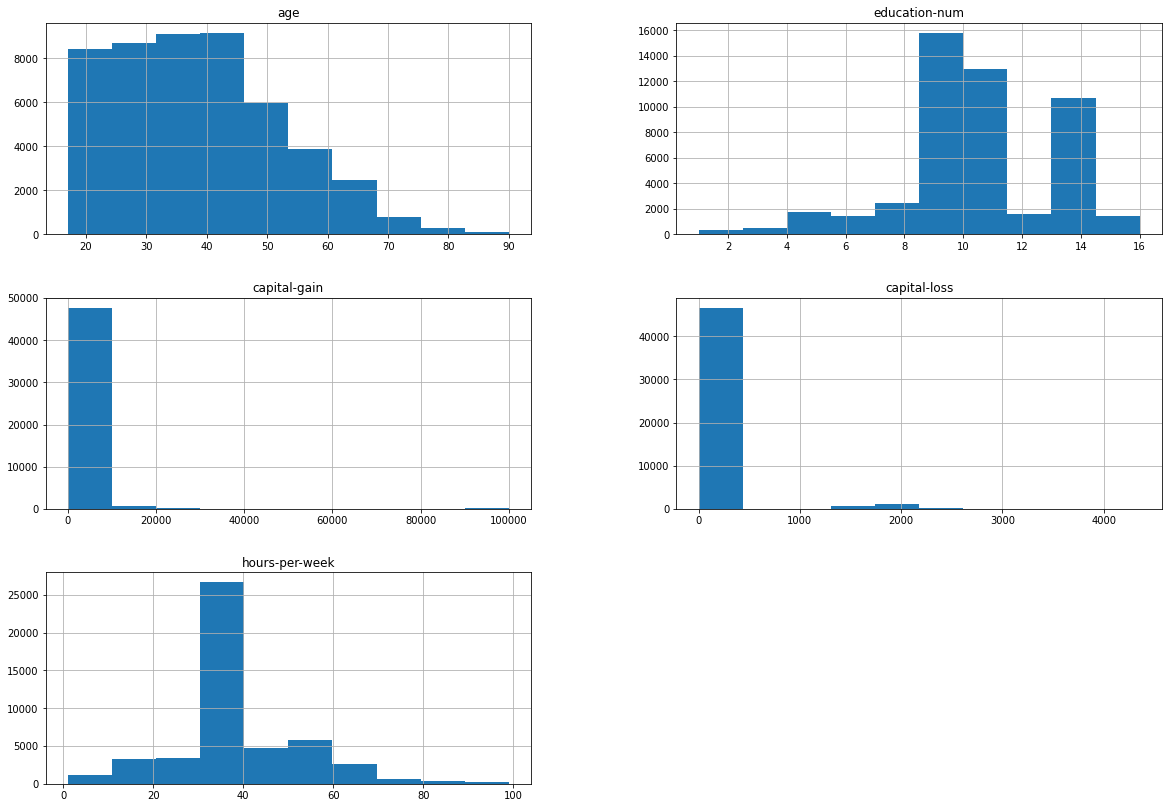

In [8]:
_ = adult_census.hist(figsize = (20,14))

First note, most values of capital gains and losses are close to 0. Moreover, retired people have been filtered out probably due to the age distribution.

In [9]:
adult_census['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

In [10]:
adult_census['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

Let's try to understand the relationship between education and 'education-num'.

In [11]:
pd.crosstab(index = adult_census['education'], columns = adult_census['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


There is a perfect correlation between these two fields. Next part will be to do a cross-plot of different variables together,

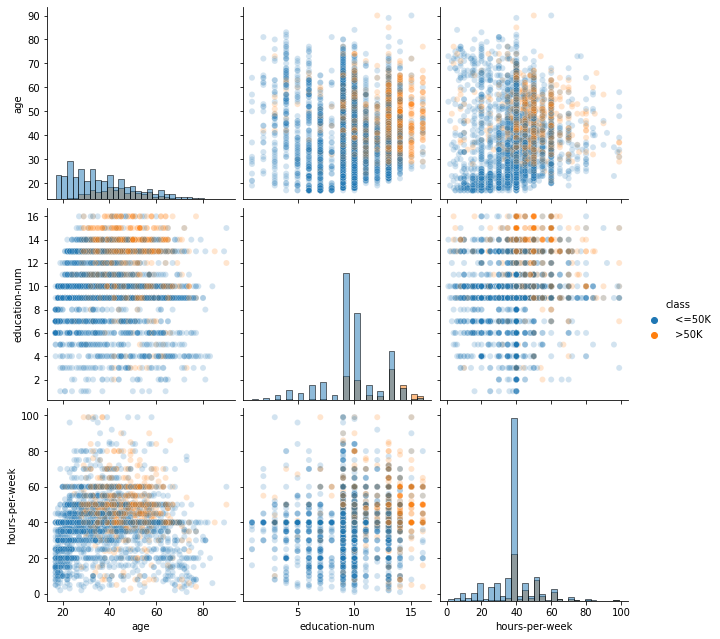

In [13]:
import seaborn as sns

n_samples_to_plot = 5000
columns = ['age', 'education-num', 'hours-per-week']
_ = sns.pairplot(data=adult_census[:n_samples_to_plot], vars=columns,
                 hue=target, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist', diag_kws={'bins': 30})

At first sight, there seems to be a strong correlation between education and the target class.

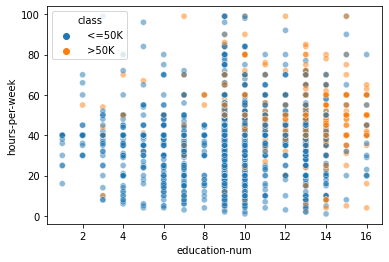

In [15]:
_ = sns.scatterplot(
    x="education-num", y="hours-per-week", data=adult_census[:n_samples_to_plot],
    hue="class", alpha=0.5,
)

Looking at this plot, we can deduce a predictive rule by hand to categorize points between the two classes.

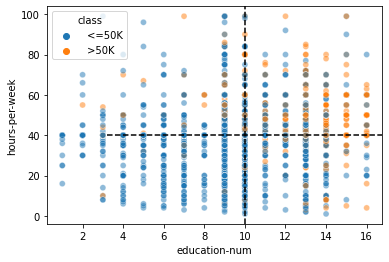

In [17]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="education-num", y="hours-per-week", data=adult_census[:n_samples_to_plot],
    hue="class", alpha=0.5,
)

education_limit = 10
plt.axvline(x=education_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

The upper right square seems to have more points of the class >50K.